<a href="https://colab.research.google.com/github/Projas-14/ADA-informes/blob/main/Informe_2_MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Problema de ordenamiento

MergeSort es un algoritmo tambien conocido como *divide y venceras*. 

El paradigma **divide y vencerás** consiste en:

1. **Dividir** el problema en varios sub-arreglos similares al arreglo original pero más pequeños.
2. **Resolver** los sub-arreglos de manera **recursiva**, es decir, aplicando el mismo algoritmo a cada uno de ellos.
3. **Combinar** las soluciones de todos los sub-arreglo de tal manera de obtener la solución del problema orignal.



Entrada: Tendremos un arreglo de n numeros $[a_1,a_2,...,a_n]$
Salida: Obtendremos dos arreglos secuencia ordenada de menor a mayor.

$m[n/2]$ y $m[n/2] $ 

Merge 
Entrada: Tendremos dos arreglos dados por el algoritmo *mergeSort* 
 
$m[n/2]$ y $m[n/2]$  

(ordenados de menor a mayor cada uno respectivamente).

Salida: Obtendremos un arreglo ordenado de menor a mayor de largo n.

$[a_1',a_2',...,a_n']$ **de tal manera que** $ a_1'< a_2' < ... < a_n' $

## 1. funcion Merge
La funcion merge recibe dos arreglos $ a = [a_1',a_2',...,a_n']$ (de largo A) **de tal manera que** $ a_1 < a_2 < ... < a_n $ y $b = [b_1',b_2',...,b_n']$ ) de largo  B **de tal manera que** $ b_1'< b_2' < ... < b_n' $ es decir ordenados de menor a mayor, con la finalidad de unirlos y crear un arreglo de largo **n = A+B**


##Codigo de merge

In [ ]:
import random
from termcolor import colored
import copy

Contador = 0

def merge(a , b, verbose = False, n = 0):
  # a y b son arreglos ordenados de menor a mayor.
  final = []
  i,j = 0 , 0
  global Contador

  ## Verbose 
  if verbose == True : 
      print("Arreglos de entradas en el merge")
      print(colored(f"{str(a)}","red")," ",colored(f"{str(b)}","blue"))
  while(i < len(a) and j < len(b)):
    Contador +=1
    if(a[i] < b[j]):
      if verbose == True : 
        print(Contador,". comparación ", colored(f"{str(a[i])}","red"), " con ", colored(f"{str(b[j])}","blue") )
        print(" Se agrego a la lista de orden " , str(a[i]))
      final.append(a[i])
      i +=1
    else:
      if verbose == True : 
        print(Contador ,". comparando ", colored(f"{str(a[i])}","red"), " con ", colored(f"{str(b[j])}","blue") )
        print(" Se agrego a la lista de orden el elemento: " , str(b[j]))
      final.append(b[j])
      j += 1
    
    
  # se agregan los resultados finales
  final += a[i:]
  Contador +=len(a[i:])
  Contador += len(b[j:])
  final += b[j:]
  # muestra el arreglo ordenado.
  if verbose == True : 
      print("ordenado")
      print(colored(f"{str(final)}","green"),"\n")


  if(n == len(final)):
    if verbose == True :
      print("Salida: ",colored(f"{str(final)}","blue"),"\n")
    return final, Contador
  else:
    return final

x = merge([1,2,4],[3,6,100],False,6)
print(x)

([1, 2, 3, 4, 6, 100], 6)


## Descripción del algoritmo

El algortimo recibe como entrada 2 arreglos (a,b) ordenados de menor a mayor respectivamente.

Para ser ordenados dentro de un arreglo nuevo (final):

1. Se recorre los arreglo a y b comenzando en el indice i=0,j=0.

2. se compara ambos valores de dicho indice, el menor de dichos valores sera agregado al nuevo arreglo.

3. Despues de haber añadido el valor aumenta el indice del arreglo con el valor menor (ejemplo i += 1) de este modo se vuelve a repetir la secuencia del punto 2.

4. cuando uno de los dos arreglos se queda sin ningun valor a comparar se agregan los valores resultantes del otro arreglo al arreglo final.

5. dando como resultado un arreglo ordenado de menor a mayor.



## 2. Algoritmo MergeSort (Recursivo)

El algoritmo MergeSort es de tipo "divide y vecenras", este algoritmo recibe una secuencia de numeros de largo n $[a_1',a_2',...,a_n']$ como entrada y retorna 2 secuencia ordenada de menor a mayor, para luego pasar a ser ordenadas por la funcion *merge* tendra una salida de un arreglo de largo n ordenado de menor a mayor.  

## Codigo MergeSort (Recursivo)


In [ ]:
import random
from termcolor import colored
import copy

Contador_profundidad = 0

def MergeSort(lista, n= 0, verbose = False, drc=False, izq=False, flag = True):
  

    
  global Contador_profundidad
  

  if flag:
      n = len(lista)
      flag = False
  
  if verbose == True and drc == False and izq == False: 
      print("entrada:" ,colored(f"{str(lista)}"+ "\n"))
  if verbose == True and drc == True and izq == False: 
      print("Rama Derecha")
      print(colored(f"{str(lista)}" ))
      if len(lista) == 1:
        print("\n")

  if verbose == True and drc == False and izq == True: 
      
      print("Rama Izquierda")
      print(colored(f"{str(lista)}"))
      if len(lista) == 1:
        print("\n")

  #si la lista es menor a 2 esta tendra solo 1 dato entonces se retorna ese dato
  
  if len(lista) < 2:
    return lista
  else:
    
    #divide el arreglo en 2 
    mitad = int(len(lista)/2)
     # manda en ramas cada uno de las mitades
    izquierda = MergeSort(lista[:mitad],n,verbose,False,True,flag)
    Contador_profundidad +=1
    derecha = MergeSort(lista[mitad:],n,verbose,True,False,flag) 
    Contador_profundidad +=1
    
    resultado = merge(derecha,izquierda, verbose, n)

    return resultado

In [ ]:
Contador = 0
Contador_profundidad = 0

print("Entrada: [1,24,5,2,3,123]")
lista = [1,24,5,2,3,123]

Ordenado, iteraciones = MergeSort(lista)
print("Salida:", Ordenado)
print("Numero de iteraciones: ", iteraciones)
print("número de llamadas: ", Contador_profundidad)

Entrada: [1,24,5,2,3,123]
Salida: [1, 2, 3, 5, 24, 123]
Numero de iteraciones:  16
número de llamadas:  10


## Descripción del algoritmo
El algoritmo *MergeSort* se recibe un arreglo de largo n elementos que se busca ordenar.
1. divide en 2 ramas principales el arreglo dado (Derecha y izquierda).
2. Se vuelve a llamar a la funcion *MergeSort* dandole las ramas divididas, hasta que se encuentre 1 dato en cada rama.
3. estos datos se van ordenando en el merge comparando la ramas derecha con la izquierda de modo que se ordenen de menor a mayor, Hasta que se llega nuevamente a la 2 ramas principales pero esta vez ordenadas de menor a mayor.
5. Para al final realizar el ultimo merge para retornar un arreglo de n elementos ordenados de menor a mayor.



## ejemplo MergeSort - Merge










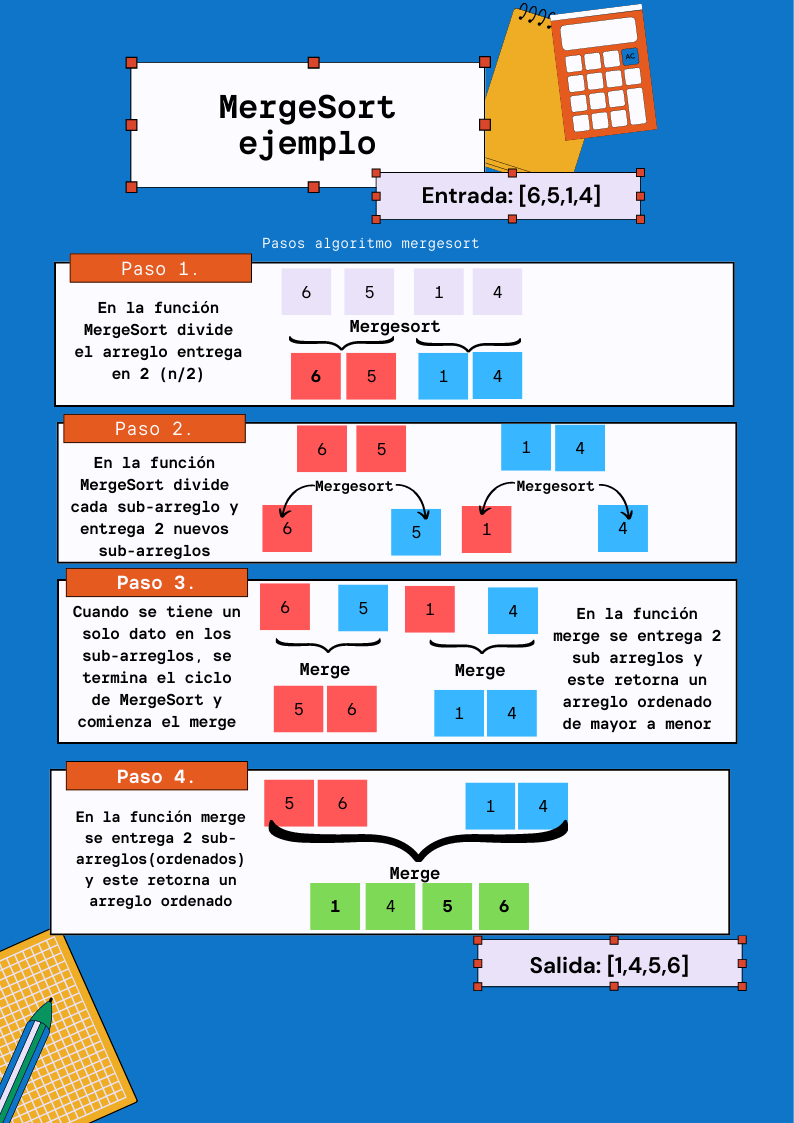

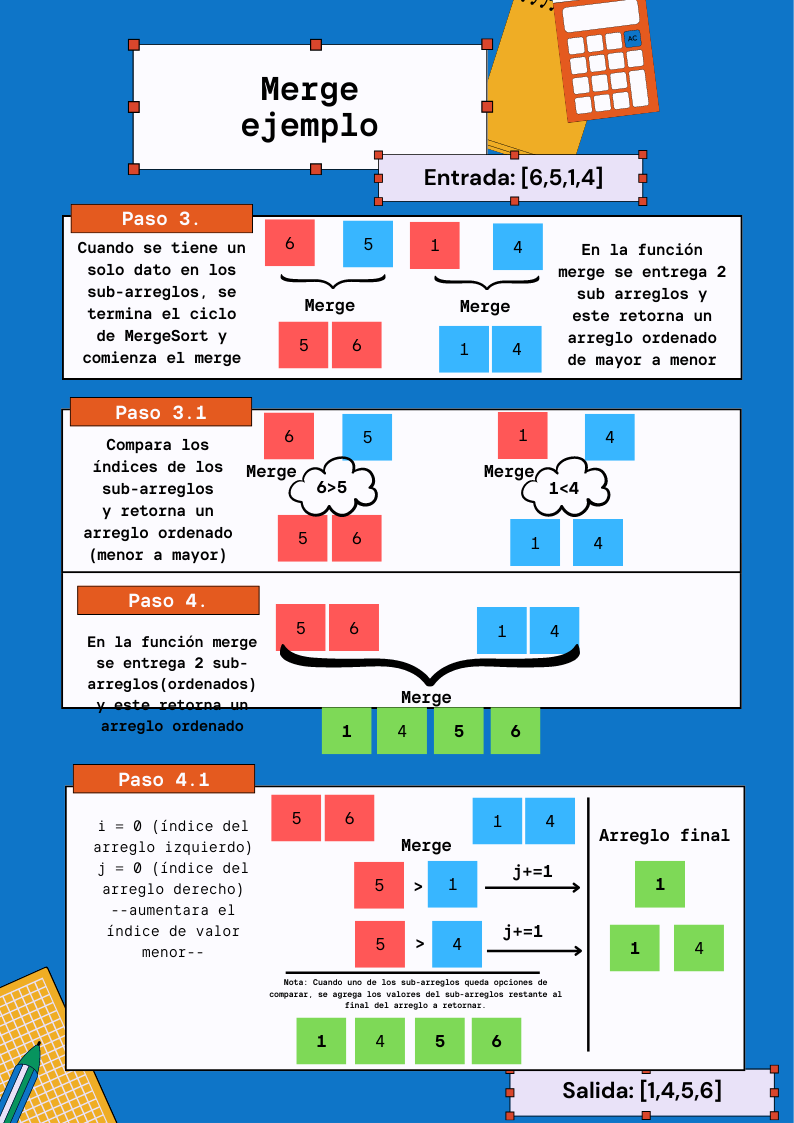

## Ejecucion del algoritmo pasa a paso (verbose = true)


In [ ]:
import random
a = random.sample(range(1, 100), 5)
Contador = 0
Contador_profundida = 0
b = MergeSort(a,verbose=True)

entrada: [41, 40, 5, 23, 16]

Rama Izquierda
[41, 40]
Rama Izquierda
[41]


Rama Derecha
[40]


Arreglos de entradas en el merge
[40]   [41]
1 . comparación  40  con  41
 Se agrego a la lista de orden  40
ordenado
[40, 41] 

Rama Derecha
[5, 23, 16]
Rama Izquierda
[5]


Rama Derecha
[23, 16]
Rama Izquierda
[23]


Rama Derecha
[16]


Arreglos de entradas en el merge
[16]   [23]
3 . comparación  16  con  23
 Se agrego a la lista de orden  16
ordenado
[16, 23] 

Arreglos de entradas en el merge
[16, 23]   [5]
5 . comparando  16  con  5
 Se agrego a la lista de orden el elemento:  5
ordenado
[5, 16, 23] 

Arreglos de entradas en el merge
[5, 16, 23]   [40, 41]
8 . comparación  5  con  40
 Se agrego a la lista de orden  5
9 . comparación  16  con  40
 Se agrego a la lista de orden  16
10 . comparación  23  con  40
 Se agrego a la lista de orden  23
ordenado
[5, 16, 23, 40, 41] 

Salida:  [5, 16, 23, 40, 41] 



## 3. ¿El algoritmo es correcto?
### Teorema (Correctitud del algoritmo MergeSort)

El algoritmo **MergeSort** genera un arreglo: $[a_1',a_2',...,a_n']$ con los mismo valores del arreglo de entrada pero ordenados de menor a mayor, $ a_1'\leq a_2'\leq ... \leq a_n'$

## Prueba de correctitud
Para probar la correctitud usaremos *inducción matemática*:

## propiedad invariente de bucle.

Al comienzo de i-ésima iteracion de merge: 
* se asume que las entradas de los arreglos esta ordenadas por lo que tenemos que el siguiente elemento es mayor al i-ésimo de los elementos ya ordenados.

de esta forma en cada iteracion obtendremos que el siguiente elemento sera mayor a los de nuestro arreglo ordenado por lo que se cumple con la propiedad de bucle y el algoritmo es correcto.

#### **Inicializacion**
en la primera iteración la función recibe solamente un arreglo vacio y como es un arreglo vacio siempre esta ordenado, por otra parte la funcion recibe los menores elementos de los sub-arreglos [izquierdo]-[Derecho] y esto aun no se guardan en el arreglo final.

#### **Mantencion**
Usando la siguiente iteracion donde ahora se encuentra el menor elemento entre [izquierdo] y [Derecho] de la iteracion anterior, en caso de ser el [izquierdo] se compara el siguiente elemento de [izquierdo] con el primer elemento de [derecho], de esta manera son menores al elemento de su respectivo arreglo final, al solo contener un elemento este estara ordenado y se cumple en la siguiente iteración.













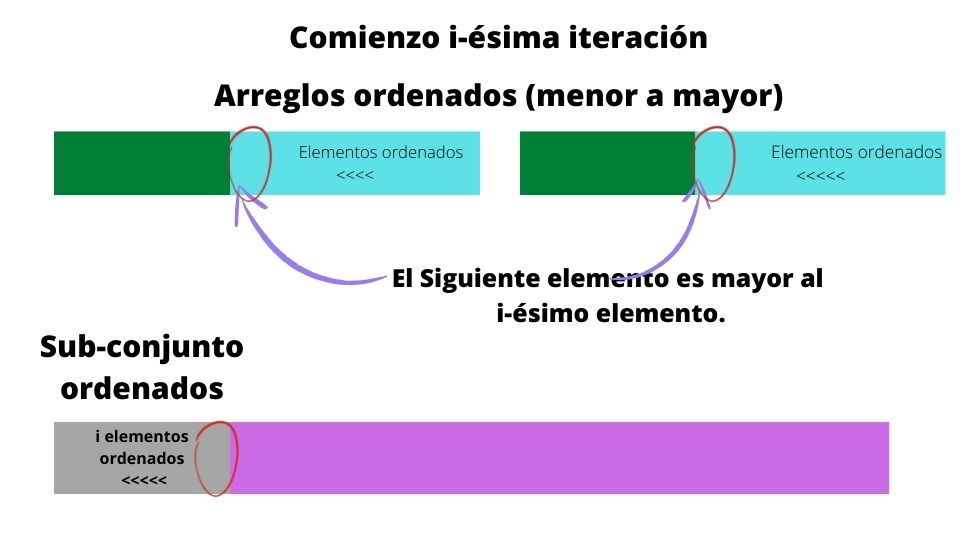

## Induccion para probar la correctitud.

Ahora para probar una declaracion $p(n)$, para todos los números naturales n:

* **Base:** se demuestra que p(n) para un caso ejemplo p(1).

 si n=1 en MergeSort se retorna el unico elemento, por lo cual se cumple P(1). 



*   **Paso inductivo** como se demostro que p(n) se cumple entonces por **hipótesis inductiva** $p(m)$ tambien se cumple, de tal manera que $m < n$ entonces $p(n)$ tambien lo es.

Para n elementos, el algoritmo divide el arreglo en 2 sub-arreglos de tamaño $m = n/2$ y $m =n/2$ y son ordenada por el mergeSort. 
De modo que se cumple que el tamaño de los sub-arreglos es menoa a n, con el *paso inductivo* asumimos que son ordenadas correctamente.

Como se cumple que se ordenan, asumimos que son ordenadas, entonces es correcta.

## 4. Tiempo de ejecución del algoritmo

En el *MergeSort* se encarga de dividir un arreglo de largo N en subarreglos (n/2) 
* si el tamaño del problema es muy pequeño como 1 entonces el tiempo que se requiere el algoritmo sera constante
$T(N)= O(1)$
* Para tamaño mas grandes, el algoritmo divide el problem en c subarreglos, cada uno de los cuales es 1/b del problema original. por lo tanto, podemos decir que el algoritmo se domora $c*T(N/b)$ en resolver los sub-arreglos de un arreglo original de tamaño N.

por lo tanto el tiempo que demora el algoritmo:

$T(N) = \begin{cases}
  O(1)  & N \text{ si es pequeño} \\
  a\cdot 2T(N/2) + C(N) & \text{ de lo contrario}
\end{cases}$

A partir de esta ecuacion, podemos crear el siguiente árbol de recursión.

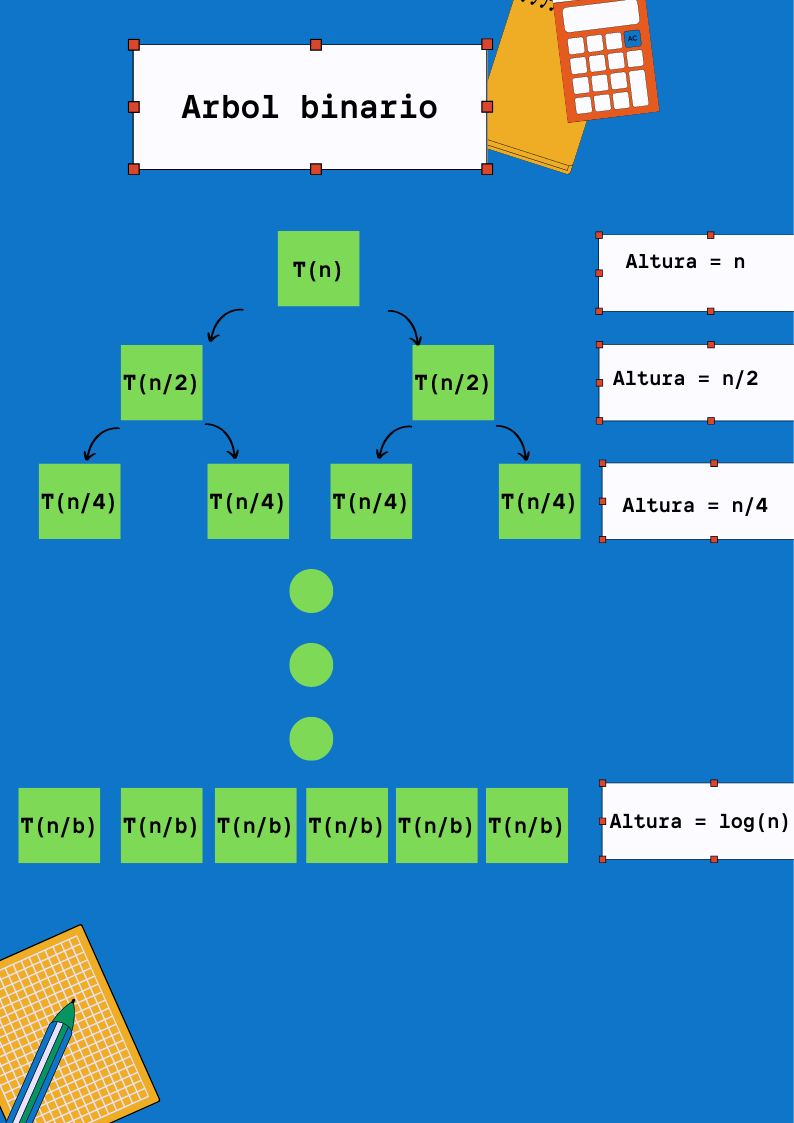

Podemos observar que el tiempo de cada nivel es constante. 

consideremos que la altura del árbol es $log_2(n)$, tenemos que el tiempo de ejecucion es $a*log_2(n)$, lo cual corresponde a una complejidad **O(Log(n))**

## Experimentos


## Grafico comparaciones realizadas experimentalmente con el mejor y peor caso teóricos.

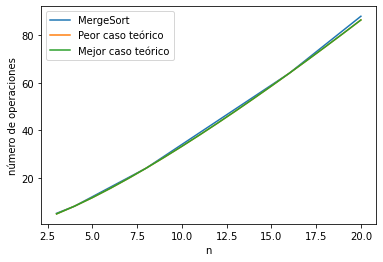

In [ ]:
import matplotlib.pyplot as plt
import math

x=[n for n in range(3,100)] 
y1=[n*math.log2(n) for n in range(3,100)] # Peor caso
y2=[n*math.log2(n) for n in range(3,100)] # mejor
y=[]; 

for n in range(3,21):
  a = random.sample(range(1, 200), n)
  Contador = 0
  Contador_profundida = 0
  a, counter = MergeSort(a)
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MergeSort", "Peor caso teórico", "Mejor caso teórico"])

plt.xlabel('n')
plt.ylabel('número de operaciones')
plt.show()

## Analisis de MergeSort VS Mejor Caso/Peor caso

* Cantidad de comparaciones del peor caso $nlog_2(n)$.
* Cantidad de comparaciones del mejor caso -> $nlog_2(n)$.
* Cantidad de comparaciones para entradas aleatorias -> para la funcion MergeSort.

Tamaño de problema con $ n \in [3,21].$

## Analisis de resultados 
En el gráfico se aprecia como para arreglos generados aleatoriamente, estos siempre se encuentra entre la cota superior $O(log(n) $(Peor Caso) y la cota inferior $Ω(log(n)$ (mejor Caso) , como era de esperarse, debido que el algoritmo **MergeSort* Tiene una  complejidad O(Log(n))

Quedando claro que este tiene una notación $\Theta (log(n))$ 


## codigo de Insertion_sort

In [15]:

def Insertion_Sort(arg, verbose=False):
  largo_ar = len(arg) 
  contador_I = 0 #Contador der comparaciones
  if verbose == True: 
    print("input array:", arg)
  
  for i  in range(1, largo_ar):

    
        # Flag que indica si el arreglo ya se encuentra ordenado
    already_sorted = True


    key = arg[i] #obtenemos el valor del indice siguiente indice 
    
    j = i - 1 #obtenemos el indice de partida 
    

    # Se recorre el arreglo
        #Buscamos que el indice no sea negativo
        # y el valor siguiente sea mayor 
    while j >= 0 and key < arg[j]: 


             
      contador_I +=1
      arg[j+1] = arg[j]
      j -= 1
     

    arg[j+1] = key
   
  return arg, contador_I

## Grafico MergeSort vs InsertionSort (numero de Interaciones por algoritmo)

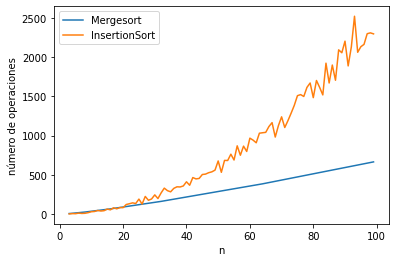

In [17]:
import matplotlib.pyplot as plt
from math import log

x=[n for n in range(3,100)] 

y=[];
y1=[]; 

for n in range(3,100):
  n = random.sample(range(1, 200), n)
  Contador = 0
  a,counter = MergeSort(n)
  b,counter1 = Insertion_Sort(n)
  y.append(counter)
  y1.append(counter1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Mergesort", "InsertionSort"])

plt.xlabel('n')
plt.ylabel('número de operaciones')
plt.show()

## Comparacion MergeSort vs InsertionSort.

En el siguiente gráfico se compara el numero de iteraciónes del algoritmo InsertionSort con el MergeSort en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre 3 y 99.

## Análisis de resultados

*  Se puede apreciar en el gráfico que ante los mismos arreglos generados aleatoriamente, el algoritmo InsertionSort, en función del tamaño del problema, aumenta en mayor proporción las iteraciones que el algoritmo MergeSort.

Lo que indica que con una mayor cantidad de elementos se vuelve más óptima la utilización del algoritmo MergeSort, aun asi en arreglos mas acotados pueden llegar a ser similares respecto a las iteraciones realizadas.

## Comparación del tiempo de ejecución entre InsertionSort y MergeSort

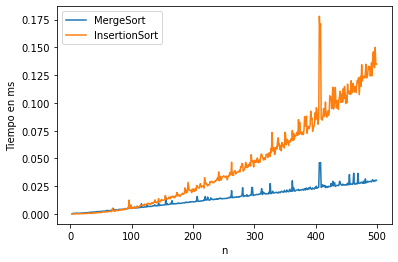

In [19]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
from copy import deepcopy

x=[]
y_bubble = []
y_insertion = []

for n in range(3,500):

  a = random.sample(range(1, 1000), n)
  b = deepcopy(a)


  t_mergeSort = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a})", repeat=1, number=10)

  t_insertion = repeat(setup="from __main__ import Insertion_Sort", stmt=f"Insertion_Sort({b})", repeat=1, number=10)

  x.append(n)
  y_bubble.append(t_mergeSort)
  y_insertion.append(t_insertion)


plt.plot(x,y_bubble)
plt.plot(x,y_insertion)
plt.legend(["MergeSort", "InsertionSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

####Comparación:
En el siguiente gráfico se compara el tiempo de ejecución del algoritmo InsertionSort con el MergeSort en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre 3 y 499.

### Análisis de resultados
Se puede apreciar en el gráfico que ante los mismos arreglos generados aleatoriamente, el algoritmo *InsertionSort*, incrementa de forma mas elevada su tiempo en ejecución, siendo muy notable a diferencia del algoritmo *MergeSort*, el cual su incremento es menor. 

Lo que indica que con una mayor cantidad de elementos se vuelve más óptima la utilización del algoritmo *MergeSort*.

Tambien se observa un Peaks en el tiempo de ejecucion de para ambos algoritmo esto puede ser por el procedimiento que ocupan recurso del procesador u otro comportamiento irregular, no obstante se aprecia que en el *InsertionSort* este peak es mas largo en comparación del *MergeSort*.